<a href="https://colab.research.google.com/github/yeeh-l/Signal-System-Hw2020/blob/circleci-project-setup/ch04_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 >Ch01-Exercises            資工二_B0729066_葉冠志<br>

<H3>先拿thinkdsp

In [16]:
# get thinkdsp 

!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"
import thinkdsp 
import thinkplot
import numpy as np

--2020-05-02 13:07:18--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48075 (47K) [text/plain]
Saving to: ‘thinkdsp.py.1’

thinkdsp.py.1       100%[===================>]  46.95K  --.-KB/s    in 0.02s   

2020-05-02 13:07:18 (1.89 MB/s) - ‘thinkdsp.py.1’ saved [48075/48075]

--2020-05-02 13:07:19--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

In [0]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
#import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

<HR>Exercise:<BR> ``A Soft Murmur'' is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

In [19]:
import IPython.display as dp

url1= 'https://freesound.org/people/Soarer/sounds/13793/download/13793__soarer__north-sea.wav'
#url2= 'https://freesound.org/people/OroborosNZ/sounds/141251/download/141251__oroborosnz__thunder-storm.aiff'
url2= 'https://freesound.org/people/soundman9826/sounds/193335/download/193335__soundman9826__rain-and-thunder.mp3'
url3= 'https://freesound.org/people/inchadney/sounds/56611/download/56611__inchadney__morning-in-the-country.wav'
url4= 'https://freesound.org/people/martypinso/sounds/22604/download/22604__martypinso__dmp010037-crickets-texas.wav'


dp.Audio(url= url1)

下面是海浪的聲音

In [0]:
fn = '/content/13793__soarer__north-sea.wav'

In [0]:
wave = thinkdsp.read_wave(fn)
#wave.make_audio()

In [0]:
wave.make_audio()

<H4>把她plot出來看看

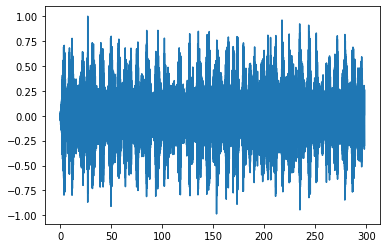

In [25]:
wave.plot()

<H4>下面把它用成片段:

In [29]:
segment = wave.segment(start= 10, duration=1.0)
segment.make_audio()

<H4>再看看他的光譜:(依樣X軸用頻率表示)(
y軸用plot出來是原本的平方)

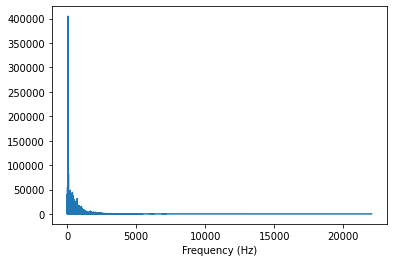

In [30]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)')

<H4>振幅会随着频率的变化而下降，所以这可能是红色或粉红色的噪声。我们可以通过在对数-log标尺上看功率谱来检查。
振福會隨著頻率變化而下降，所以這可能是噪音。我們可以用log當作y座標看看光譜圖:

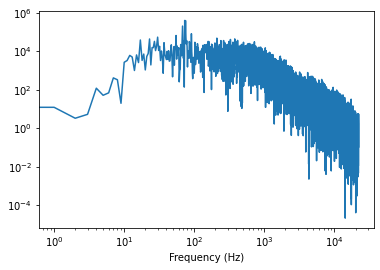

In [31]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

<H4>隨著振幅的增加然後遞減。

在$f=10^3$以上，它可能是線性下降的，但我們真的看不出來。

為了觀察頻譜隨時間的變化，我們再選取另一段。

In [32]:
segment2 = wave.segment(start=20, duration=1.0)
segment2.make_audio()

<H4>在plot出兩段進行比較:

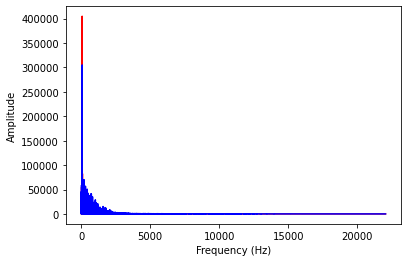

In [33]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

<H4>再看看用log過後的光譜:

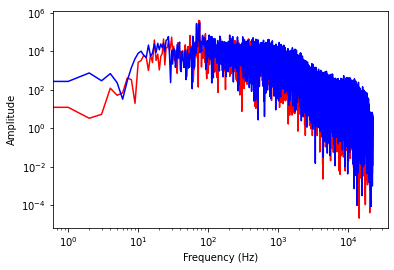

In [34]:

spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

<H4>所以，隨著時間的推移，結構似乎是一致的。
下面是spectrogram
<BR>segment 1:

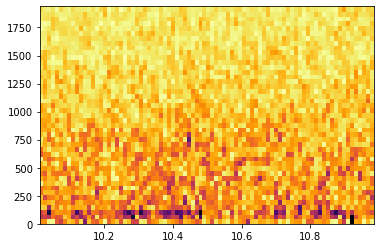

In [35]:
segment.make_spectrogram(1024).plot(high=2000)

<H4><BR>segment 2:

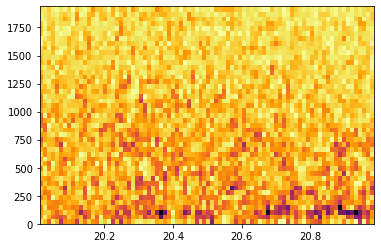

In [36]:
segment2.make_spectrogram(1024).plot(high=2000)

<HR><H3>Exercise:<BR> In a noise signal, the mixture of frequencies changes over time. In the long run, we expect the power at all frequencies to be equal, but in any sample, the power at each frequency is random.

To estimate the long-term average power at each frequency, we can break a long signal into segments, compute the power spectrum for each segment, and then compute the average across the segments. You can read more about this algorithm at http://en.wikipedia.org/wiki/Bartlett's_method.

Implement Bartlett's method and use it to estimate the power spectrum for a noise wave. Hint: look at the implementation of make_spectrogram.

練習。在一個噪聲信號中，頻率的混合頻率隨時間的變化而變化。從長期來看，我們期望所有頻率的功率都是相等的，但在任何樣本中，每個頻率的功率都是隨機的。

為了估計每個頻率的長期平均功率，我們可以將一個長信號分成若干段，計算出每個段的功率譜，然後計算出各段的平均值。你可以在http://en.wikipedia.org/wiki/Bartlett's_method 中閱讀更多關於這個算法的內容。

執行Bartlett的方法，用它來估計一個噪聲波的功率譜。提示：看看make_spectrogram的實現。

In [0]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = thinkdsp.Spectrum(hs, fs, wave.framerate)
    return spectrum

<H3>用bartlett_method製作一個譜圖，並提取 spec_map，將時間映射到 Spectrum 對象。它計算每個頻譜的PSD，把它們加起來，然後把結果放到一個Spectrum中。

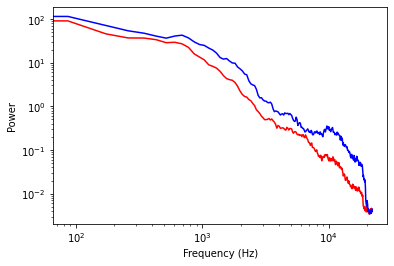

In [39]:
psd=  bartlett_method(segment)
psd2= bartlett_method(segment2)

psd.plot_power(color='red')
psd2.plot_power(color='blue')

thinkplot.config(xlabel='Frequency (Hz)', 
                 ylabel='Power', 
                 xscale='log', 
                 yscale='log')

現在我們可以更清楚地看到功率和頻率之間的關係。這不是一個簡單的線性關係，但它在不同的段位上是一致的，甚至在細節上也是一致的，比如5000赫茲附近、6000赫茲附近、10000赫茲以上的缺口。

<HR><H3>Exercise:<BR>
 At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?